In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
from scipy.signal import savgol_filter

################path:엑셀파일 저장된 경로 , save_path: 그래프저장할경로, 그래프로 표시할 라인갯수#################################
path = 'E:/'
save_path = 'E:/'
line_num = 16
########################################################################################################################


y = ['y0', 'y1', 'y2', 'y3', 'y4', 'y5', 'y6', 'y7', 'y8', 'y9', 'y10', 'y11', 'y12', 'y13', 'y14', 'y15'][0:line_num]
file_list = os.listdir(path)
if not file_list:
    print('경로확인, 경로 지정안되었습니다.')
    sys.exit()
for file_name in file_list:
    if file_name.endswith(".csv"):
        df = pd.read_csv(os.path.join(path, file_name), sep='\t', header=None)  # encoding='CP949', sep= ''
        data = np.array(df)

        if line_num+2 == data.shape[1]:
            pass
        else:
            print('line 갯수를 확인해야합니다.\n 시스템을 종료합니다')
            sys.exit()

        load = data[:, len(y):len(y)+1]
        dis = data[:, len(y)+1:len(y)+2]

        num = np.shape(data)[0]
        x = np.arange(num)
        if num%2==0:
            win_length = num-1
        else:
            win_length = len(y[i])

        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        for i in range(0, len(y)):
            y[i] = data[:, i:i + 1]
            # y[i] = savgol_filter(y[i].flatten(),win_length,1)
            y[i] = savgol_filter(y[i].flatten(),201,1)

            ax1.plot(x, y[i], label=i + 1, linewidth=0.1)
        ax2.plot(x, load)
        ax2.plot(x, dis)

        ##그래프 설정 파트 #################################################
        ax1.set_ylabel('Sample Voltage') #y1축 이름
        ax2.set_ylabel('Load - Displacement') #y2축 이름
        ax1.set_xlabel('Time')    # x 축 이름
        ax1.set_ylim(6.8, 6.975)        #y축 스케일조절
        ax2.set_ylim(-10, 0)      #y2축 스케일조절
        # ax1.set_xlim(0,400)  # x축 스케일 조절

        plt.savefig(save_path + '/' + file_name + '.png', dpi=300)
        print(file_name, "완료!")
        plt.close(fig)
print('최종 끝')
#######

In [ ]:
""" macro 좌표 입력 """

import pyautogui
import time
start = time.time()

print(pyautogui.size())
print(pyautogui.position())

time.time()-start

In [ ]:
import pyautogui
import time

f = time.time()
for i in range(5):
    start = time.time()
    pyautogui.click(x=547, y=228) ##창 클릭 후 마우스 커서 위치
    pyautogui.press(['backspace']*(i+4))

    pyautogui.write(str(i+1)+'.csv') ##파일이름 입력
    pyautogui.click(x=61, y=55) ##시작 좌표

    time.sleep(2)

    pyautogui.click(x=619,y=321,clicks=2, interval=2)
    time.sleep(5.3)

    print(time.time()-start)

print(time.time()-f)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.signal import find_peaks
import sys
import glob

##################################################
path = 'G:\experiment data/a/'
save_path = 'G:\experiment data/b/'
rate = 500 #받는속도
range_front =  500 # 피크 앞뒤로 짜를 갯수
range_back = 500#
term = 10 #중간에 몇초쉬었는지
##################################################


file_list = os.listdir(path)
count = 1
if not file_list:
    print('경로확인')
    sys.exit()

for file_name in file_list:

    print(file_name, "시작!")
    df = pd.read_csv(os.path.join(path, file_name), sep='\t', header=None)  # encoding='CP949', sep= ''
    data = np.array(df)

    load = data[:, 8:9]
    dis = data[:, 9:10]
    x = np.arange(np.shape(load)[0])
    block = dis.flatten() * -1   #displacement 로 피크 잡을시 dis변수사용  load사용하고 싶을시 load변수변경
    peaks, _ = find_peaks(block, distance= term*rate) #peak 받아냄
    peaks = np.delete(peaks,-1) #거리로하다보면 마지막 요소 생기는데 이거 삭제

    for i in peaks[0:len(peaks)]: # 첫번째 그래프빼고싶으면 1:len~~
        plt.axvspan(i - range_front, i + range_back, alpha=0.1, color='green')
        result = data[i-range_front:i+range_back+1 ,:]
        np.savetxt(save_path+file_name.split('.')[0]+'_'+str(count)+'.'+file_name.split('.')[1], result, delimiter='\t', fmt='%4e')
        count += 1
    plt.plot(block*-1,c = 'black', linewidth=0.5)
    plt.plot(peaks, block[peaks]*-1, "x", c='red')
    plt.savefig(save_path+file_name.split('.')[0]+'check.png', dpi=300)
print('끄으으으으으으으읕')

filter(11,3)_3.csv 완료!
filter(11,3)_4.csv 완료!
filter(11,3)_6.csv 완료!
filter(11,3)_7.csv 완료!
filter(11,3)_8.csv 완료!
최종 끝


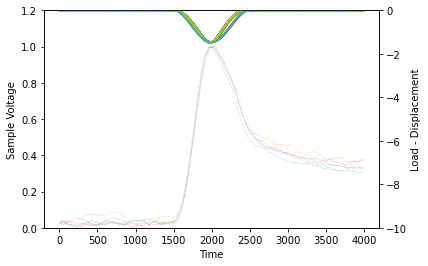

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
from scipy.signal import find_peaks
from scipy.signal import savgol_filter

################path:엑셀파일 저장된 경로 , save_path: 그래프저장할경로, 그래프로 표시할 라인갯수#################################
path = 'D:/experiment data\kepyad_2/regression/practice'
save_path = 'D:/experiment data\kepyad_2/regression/practice_g'
line_num = 16
########################################################################################################################
k=0

y = ['y0', 'y1', 'y2', 'y3', 'y4', 'y5', 'y6', 'y7', 'y8', 'y9', 'y10', 'y11', 'y12', 'y13', 'y14', 'y15'][0:line_num]
vx = ['vx0' ,'vx1', 'vx2', 'vx3', 'vx4']
vl = ['vl0' ,'vl1', 'vl2', 'vl3', 'vl4']
vd = ['vd0' ,'vd1', 'vd2', 'vd3', 'vd4']
file_list = os.listdir(path)
if not file_list:
    print('경로확인, 경로 지정안되었습니다.')
    sys.exit()
for file_name in file_list:
    value = np.array([])
    if file_name.endswith(".csv"):
        df = pd.read_csv(os.path.join(path, file_name), sep='\t', header=None)  # encoding='CP949', sep= ''
        data = np.array(df)

        if line_num+2 == data.shape[1]:
            pass
        else:
            print('line 갯수를 확인해야합니다.\n 시스템을 종료합니다')
            sys.exit()

        load = data[:, len(y):len(y)+1]
        dis = data[:, len(y)+1:len(y)+2]

        num = np.shape(data)[0]
        x = np.arange(8000)


        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        for i in range(0, len(y)):
            y[i] = data[:, i:i + 1]
            value = np.append(value,np.max(y[i])-np.min(y[i]))
            # y[i] = savgol_filter(y[i].flatten(),win_length,1)
            # y[i] = savgol_filter(y[i].flatten(),201,1)
        max_index = np.argmax(value)
        yy = (y[max_index]-np.min(y[max_index]))/(np.max(y[max_index]-np.min(y[max_index])))

        # ax1.plot(x, y[np.argmax(value)], label=i + 1, linewidth=0.1)
        block = dis.flatten() * -1   #displacement 로 피크 잡을시 dis변수사용  load사용하고 싶을시 load변수변경
        peaks, _ = find_peaks(block, distance= 2000, height= 1) #peak 받아냄# #거

        vl[k] = load[int(peaks-2000):int(peaks+2000)]
        vd[k] = dis[int(peaks-2000):int(peaks+2000)]
        vx[k] = yy[int(peaks-2000):int(peaks+2000)]
        ax1.plot(x, yy, label=i + 1, linewidth=0.1)
        ax2.plot(x, load)
        ax2.plot(x, dis)
        ##그래프 설정 파트 #################################################
        ax1.set_ylabel('Sample Voltage') #y1축 이름
        ax2.set_ylabel('Load - Displacement') #y2축 이름
        ax1.set_xlabel('Time')    # x 축 이름
        # ax1.set_ylim(6.8, 6.975)        #y축 스케일조절
        # ax2.set_ylim(-10, 0)      #y2축 스케일조절
        # ax1.set_xlim(0,400)  # x축 스케일 조절
        plt.savefig(save_path + '/' + file_name + '.png', dpi=300)
        print(file_name, "완료!")
        plt.close(fig)
        k= k+1

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
for i in range(0,5):
    ax1.plot(np.arange(4000), vx[i], label=i + 1, linewidth=0.1)
    ax2.plot(np.arange(4000), vl[i])
    ax2.plot(np.arange(4000), vd[i])
    ax1.set_ylabel('Sample Voltage') #y1축 이름
    ax2.set_ylabel('Load - Displacement') #y2축 이름
    ax1.set_xlabel('Time')
    ax2.set_ylim(-10, 0)
    ax1.set_ylim(0, 1.2)
    plt.savefig(save_path + '/' + file_name + 'add.png', dpi=300)
print('최종 끝')
#######

array([[0.016],
       [0.001],
       [0.001],
       ...,
       [0.001],
       [0.026],
       [0.006]])